#  V.223 Brown'sche Bewegung

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
plt.style.use('classic')

### 3.1 Importieren und grafische Darstellung der Messdaten

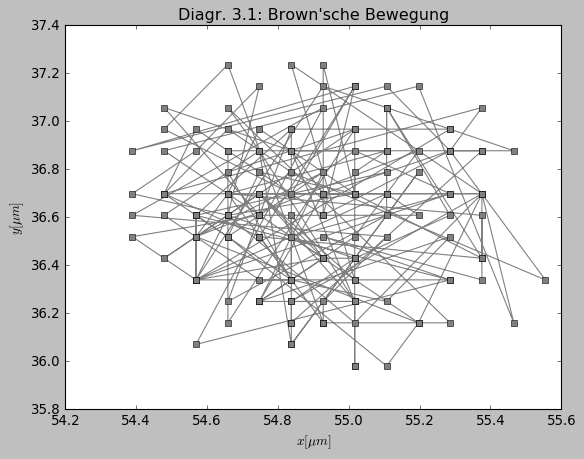

In [58]:
#Laden der Messdaten

t, x, y = np.loadtxt('/home/janpbeckmann/Documents/SS 2018/PAP 2.1/V223/Messung.dat', skiprows = 1, usecols = (1, 2, 3), unpack = True)

#Plotten

plt.plot(x, y, marker = 's', color = 'gray', linewidth = 1)
plt.xlabel('$x [\mu m]$')
plt.ylabel('$y [\mu m]$')
plt.title('Diagr. 3.1: Brown\'sche Bewegung')
plt.savefig('Diagr.3.1.jpg', format = 'jpeg', dpi = 600)

### 3.2 Berechnen des mittleren Verschiebungsquadrates und dessen Fehler

In [65]:
#Mittleres Verschiebungsquadrat: Δx_i = x_(i+1) - x_i; Δy analog

dt = np.array([])
dx = np.array([])
dy = np.array([])

i = 0

while i < len(t)-1:
    dt = np.append(dt, t[i+1] - t[i])
    dx = np.append(dx, x[i+1] - x[i])
    dy = np.append(dy, y[i+1] - y[i])
    i = i + 1
    
r_sq = (dx**2 + dy**2)
r_sq_mean = np.mean(r_sq)
r_sq_mean_std = np.std(r_sq)/np.sqrt(len(r_sq))
dt_mean = np.mean(dt)

print('r_sq_mean = ', r_sq_mean)
print('r_sq_mean_std =', r_sq_mean_std)
print('dt_mean = ', dt_mean)

r_sq_mean =  0.2642795562499998
r_sq_mean_std = 0.020345022912359463
dt_mean =  1.01681875


#### Boltzmann- und Diffusionskonstante

In [81]:
# Eingabe der Messdaten

T = 298.05 #Temperatur [K]
dT = 0.2 

η = 8.9e-4 #Viskosität von Wasser bei T = 24.9°C
dη = 0.05e-4

a = 0.5e-6 #Partikelradius [m]
da = 0.5e-7


#Berechnung der Boltzmannkonstante k_b und der Diffusionskonstante D

k = (6*np.pi*η*a)/(4*T*dt_mean)*r_sq_mean*10e-12
dk = k*np.sqrt((dη/η)**2 + (da/a)**2 + (dT/T)**2 +(r_sq_mean_std/r_sq_mean)**2)

D = r_sq_mean/(4*dt_mean)*10e-12
dD = D*(r_sq_mean_std/r_sq_mean)

print('Boltzmannkonstante: k_b = ({:.4f} +/- {:.4f})e-23 J/K' .format(k*10**23, dk*10**23))
print('Diffusionskonstante: D = ({:.4} +/ {:.4f})e-12' .format(D*10**12, dD*10**12))

Boltzmannkonstante: k_b = (1.8287 +/- 0.2310)e-23 J/K
Diffusionskonstante: D = (0.6498 +/ 0.0500)e-12


### 3.3 Kontrollverteilung

/home/janpbeckmann/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/janpbeckmann/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


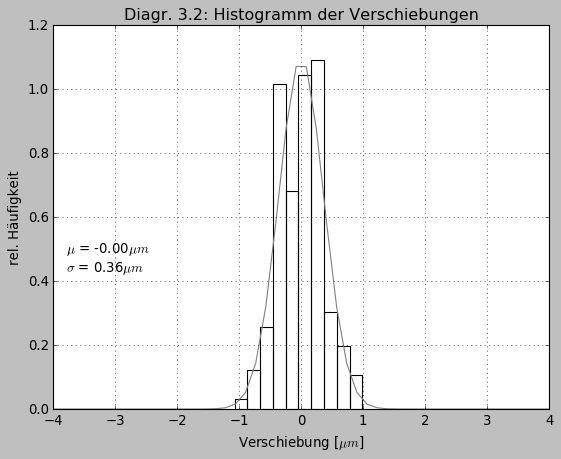

In [69]:
#Erstellung eines Histogramms

all_data = np.append(dx, dy)
plt.hist(all_data, normed = 1, fill = False)

μ = np.mean(all_data)
sigma = np.std(all_data)
gauss = mlab. normpdf(np.linspace(-4, 4), μ, sigma)

plt.plot(np.linspace(-4,4), gauss, 'b-', linewidth = 1, color = 'gray')
plt.xlabel('Verschiebung [$\mu m$]')
plt.ylabel('rel. Häufigkeit')
plt.title('Diagr. 3.2: Histogramm der Verschiebungen')
plt.text(-3.8, 0.43, '$\mu$ = '+str('%.2f' %μ) + '$\mu m$' +'\n$\sigma$ = '+str('%.2f' % sigma) + '$\mu m$')
plt.grid()
plt.savefig('Diagr.3.2.jpg', format = 'jpeg', dpi = 600)

### 3.4 Kumulative Verteilung der Verschiebungsquadrate

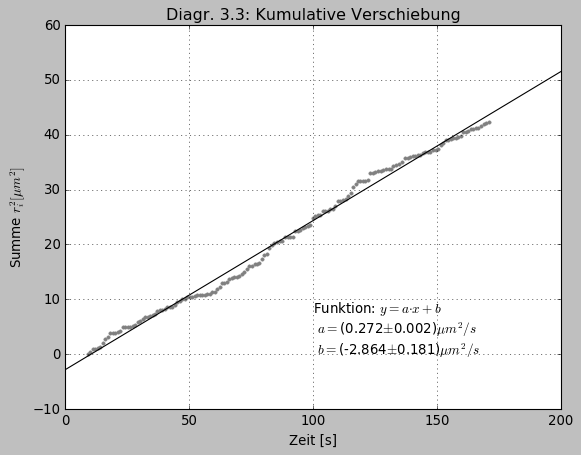

In [72]:
r_krumm = np.cumsum(r_sq)
plt.plot(t[:-1], r_krumm, marker = '.', color = 'gray', linewidth = 0)
plt.xlabel('Zeit [s]')
plt.ylabel('Summe $r_i^2 [\mu m^2]$')
plt.title('Diagr. 3.3: Kumulative Verschiebung')

from scipy.optimize import curve_fit

def linear(x, a, b):
    return a*x + b

popt, pcov = curve_fit(linear, t[:-1], r_krumm)

a1 = popt[0]
da1 = np.sqrt(pcov[0][0])
b1 = popt[1]
db1 = np.sqrt(pcov[1][1])

plt.plot(np.linspace(0, 200), linear(np.linspace(0, 200), *popt), color = 'black', linewidth = 1)
plt.text(100, 0, 'Funktion: $y = a$$\cdot$$x + b$' '\n $a = $'+'('+str('%.3f' %a1) +'$\pm$' +str('%.3f' % da1) +')'+'$\mu m^2/s$'
        '\n $b = $'+'('+str('%.3f' %b1) +'$\pm$' +str('%.3f' % db1) +')'+'$\mu m^2/s$')

plt.grid()
plt.savefig('Diagr.3.3.jpg', format = 'jpg', dpi = 600)

In [82]:
#Berechnung der Boltzmann- und Diffusionskonstanten aus der Steigung

c = popt[0]
dc = np.sqrt(pcov[0,0])

k2 = c*(6*np.pi*η*a)/(4*T)*10e-12
dk2 = k2*np.sqrt((dc/c)**2 + (dη/η)**2 + (dT/T)**2 + (da/a)**2)

print('Boltzmannkonstante: k_B\' = ({:.4f} +/- {:.4f})e-23 J/K' .format(k2*10**23, dk2*10**23))
print('Diffusionskonstante: D\' = ({:.4} +/ {:.4f})e-12' .format(c, dc))

Boltzmannkonstante: k_B' = (1.9132 +/- 0.1920)e-23 J/K
Diffusionskonstante: D' = (0.2719 +/ 0.0018)e-12
